   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0
Train shape: (189, 4) Test shape: (81, 4)
Accuracy: 0.654320987654321
Precision: 0.5666666666666667
Recall: 0.53125
Confusion Matrix:
 [[36 13]
 [15 17]]


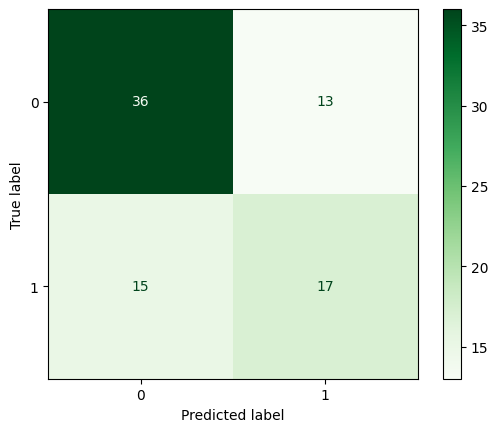

OOB Score: 0.656084656084656


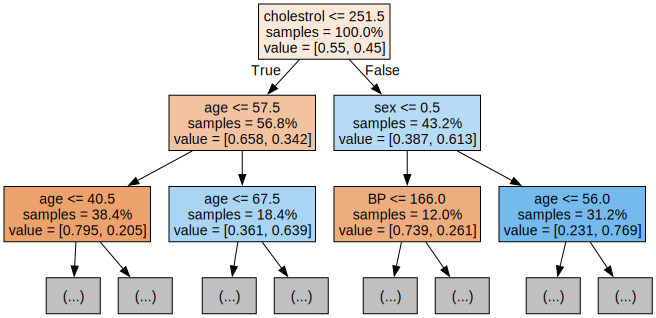

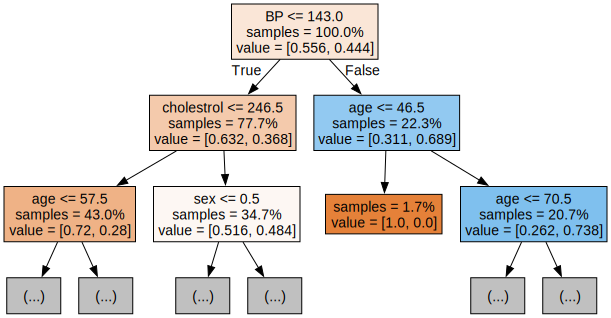

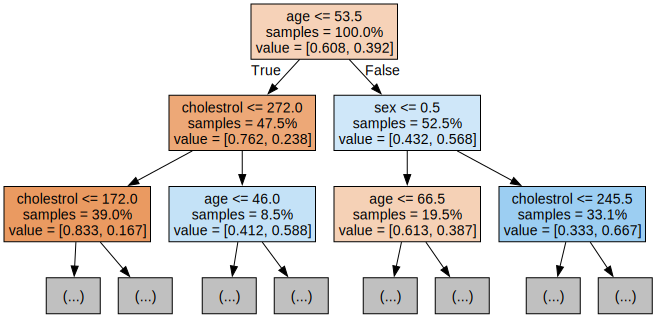

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

df = pd.read_csv('heart_v2.csv')
print(df.head())

X = df.drop('heart disease', axis=1)
y = df['heart disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    n_estimators=100,
    oob_score=True
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Greens)
plt.show()

print("OOB Score:", rf.oob_score_)

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(
        tree,
        feature_names=X_train.columns,
        filled=True,
        max_depth=2,  
        impurity=False,
        proportion=True
    )
    graph = graphviz.Source(dot_data)
    display(graph)
